## Predicting Salary

### A Multilinear Regression Model

*by Charles Pryor & Akshay Indusekar*

We started by importing all of the necessary packages that we knew we would need.  I keep these in a separate file and import all of them at the same time whenever there is a project.

In [346]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import itertools
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline

We found our data set on Kaggle.  This reflects the variables in which we want to produce a model that will predict income by state and several variables in which we ultimately decided upon as we perform metrics which tell us which is relevant.  We imported our data into pandas DataFrame.  From here on out, I will use the present tense.

In [301]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,0.0,0.0,4329,20522.0,2879.0,8643.0,1218.0,39.4,61.8,42.2,25.3,18.0,7.7,6.9,76.1,13.5,6.2,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,0.0,0.0,1716,24605.0,6027.0,11109.0,1829.0,35.5,39.9,34.4,13.4,23.1,12.3,16.8,82.0,7.5,9.2,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,0.2,0.0,1616,18225.0,4913.0,9603.0,2162.0,52.8,77.2,29.3,23.6,32.9,4.6,9.6,85.3,7.8,0.0,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,0.0,0.0,3346,18688.0,4501.0,8331.0,1280.0,50.1,58.0,29.8,20.6,28.8,13.9,6.9,97.1,1.8,1.1,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


We start to analyze our data set.  Here we wish to see if our set includes all of the states.  The original data set has 74,001 rows and 37 columns.

In [304]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


It is imperative that we see a true representation of all states in the Union since we are predicting salary by each state.

In [305]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [307]:
x_cols = df.columns.tolist()

In [308]:
del x_cols[0]
x_cols

['State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [309]:
df = df[df['Income'].notna()]
df = df[df['ChildPoverty'].notna()]
df = df[df['MeanCommute'].notna()]

In [310]:
df.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [311]:
df1.duplicated().sum()

0

In [312]:
df1 = df[[
       'Poverty',
       'ChildPoverty', 'Professional', 'Service','Construction', 'Office', 
       'Production']]
df1

,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...
73996,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [313]:
df1.isnull().sum()

Poverty         0
ChildPoverty    0
Professional    0
Service         0
Construction    0
Office          0
Production      0
dtype: int64

In [314]:
df2 = df.groupby(["State"]).sum().head(85)
df2.sort_values(by = 'IncomePerCap').sum()

TractId             2.063222e+15
TotalPop            3.231214e+08
Men                 1.588425e+08
Women               1.642789e+08
Hispanic            1.256782e+06
White               4.460314e+06
Black               9.638347e+05
Native              5.292240e+04
Asian               3.455893e+05
Pacific             1.062280e+04
VotingAgeCitizen    2.284190e+08
Income              4.444524e+09
IncomeErr           7.046611e+08
IncomePerCap        2.230018e+09
IncomePerCapErr     3.090316e+08
Poverty             1.166886e+06
ChildPoverty        1.537875e+06
Professional        2.585402e+06
Service             1.370585e+06
Office              1.702559e+06
Construction        6.735900e+05
Production          9.396847e+05
Drive               5.517902e+06
Carpool             6.780631e+05
Transit             3.905382e+05
Walk                2.127567e+05
OtherTransp         1.371517e+05
WorkAtHome          3.354224e+05
MeanCommute         1.896510e+06
Employed            1.513486e+08
PrivateWor

In [315]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


In [316]:
df1['IncomePerCap'].value_counts()

KeyError: 'IncomePerCap'

In [317]:
corr

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Production
IncomePerCap,1.000000,-0.602569,-0.577749,0.807839,-0.588252,-0.555223
Poverty,-0.602569,1.000000,0.891099,-0.540074,0.583932,0.326724
ChildPoverty,-0.577749,0.891099,1.000000,-0.563606,0.547342,0.369967
Professional,0.807839,-0.540074,-0.563606,1.000000,-0.658900,-0.696504
Service,-0.588252,0.583932,0.547342,-0.658900,1.000000,0.210827
Production,-0.555223,0.326724,0.369967,-0.696504,0.210827,1.000000


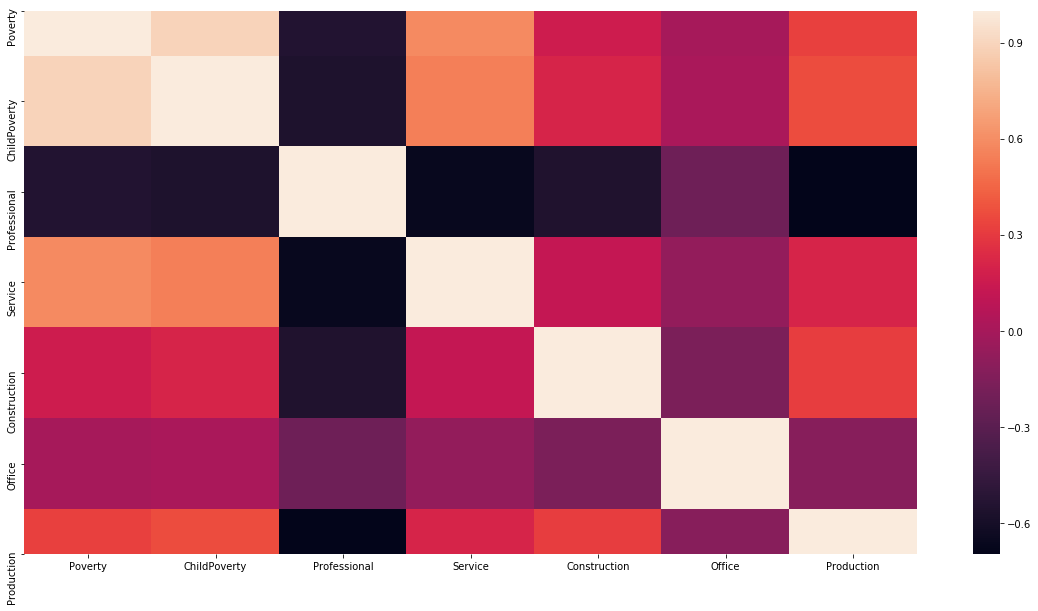

In [318]:
# plot the heatmap
corr = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [321]:
sns.boxplot(df1.IncomePerCap)

AttributeError: 'DataFrame' object has no attribute 'IncomePerCap'

In [320]:
y = df['IncomePerCap']
scaler = StandardScaler()
np.array(df1).reshape(-1,1)

array([[10.7],
       [20.8],
       [38.5],
       ...,
       [17.8],
       [19.1],
       [26.9]])

In [322]:
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [323]:
transformed_data = scaler.transform(df1)

In [324]:
transformed_data
ridge_reg = Ridge()

In [325]:
ridge_reg.fit(transformed_data, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [326]:
print(ridge_reg.coef_)


[-4722.85358571  1249.04266201  6420.74614245 -2406.6226845
 -1760.18713865 -1504.92484516 -2363.17321526]


In [327]:
ridge_reg.predict(scaler.transform(np.array([8, 17, 40, 10,25,20,5])))

ValueError: Expected 2D array, got 1D array instead:
array=[ 8. 17. 40. 10. 25. 20.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [328]:
df1 = df[[ 'Poverty',
       'ChildPoverty', 'Professional', 'Service','Construction', 'Office', 
       'Production']]
df1

,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...
73996,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [338]:
x_cols = df1.columns.tolist()


In [339]:
x_cols

['Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Construction',
 'Office',
 'Production']

In [336]:
del x_cols[0]

In [340]:

for col in x_cols:
    ## This is called standard scaling
    ## Here we don't have to do this but still it is a good practice
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()
df1.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,-0.430194,-0.018763,0.195906,-0.407542,0.258579,-0.109663,-0.068793
1,0.511180,0.788874,-0.336052,0.759391,-0.498506,-0.091778,0.326333
2,-0.108357,-0.002610,-0.508938,0.069270,0.107162,1.768236,-0.437578
3,-1.106052,-1.047153,-0.435794,-0.282065,-0.027431,0.426880,0.866339
4,-0.309505,-0.174906,0.880801,-0.633400,-0.969581,-0.521012,0.062916


In [332]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 7 columns):
Poverty         72718 non-null float64
ChildPoverty    72718 non-null float64
Professional    72718 non-null float64
Service         72718 non-null float64
Construction    72718 non-null float64
Office          72718 non-null float64
Production      72718 non-null float64
dtypes: float64(7)
memory usage: 4.4 MB


In [288]:
!pip install yellowbrick

     |████████████████████████████████| 266kB 5.2MB/s eta 0:00:01


Note about office

In [341]:
refined_cols = ['Poverty',
        'Professional', 'Service','Construction', 'Office', 
       'Production']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Poverty', 4.374656628571393),
 ('Professional', 4.728411696864023),
 ('Service', 8.422823531174561),
 ('Construction', 3.572582554041673),
 ('Office', 11.118577758022248),
 ('Production', 4.577552759536368)]

In [353]:
import statsmodels.api as sm

X = df1[refined_cols]
X = sm.add_constant(X.values)
model = sm.OLS(y, X, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 2.720e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:22:51   Log-Likelihood:            -7.6361e+05
No. Observations:               72718   AIC:                         1.527e+06
Df Residuals:                   72711   BIC:                         1.527e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.067e+04     32.622    940.066      0.000    3.06e+04    3.07e+04
x1         -3680.6364     41.781    -88.094      0.000   -3762.526   -3598.746
x2          8049.7723   7605.196      1.058      0.290   -6856.385     2.3e+04
x3         -1493.0360   4030.577     -0.370      0.711   -9392.953    6406.881
x4         -1061.2625   3006.005     -0.353      0.724   -6953.022    4830.497
x5          -858.9265   2827.705     -0.304      0.761   -6401.218    4683.365
x6         -1442.2947   3839.872     -0.376      0.707   -8968.431    6083.841
==============================================================================
Omnibus:                    54480.698   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2359490.473
Skew:                           3.183   Prob(JB):                         0.00
Kurtosis:                      30.170   Cond. No.                         522.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
X = df1[refined_cols]
y = df['IncomePerCap']
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=6 )

## fit the model
selector.fit(X,y)
## check which columns are selected
ind = selector.get_support()
print(ind)
X.loc[:,ind].head()

[ True  True  True  True  True  True]


,Poverty,Professional,Service,Construction,Office,Production
0,-0.430194,0.195906,-0.407542,0.258579,-0.109663,-0.068793
1,0.511180,-0.336052,0.759391,-0.498506,-0.091778,0.326333
2,-0.108357,-0.508938,0.069270,0.107162,1.768236,-0.437578
3,-1.106052,-0.435794,-0.282065,-0.027431,0.426880,0.866339
4,-0.309505,0.880801,-0.633400,-0.969581,-0.521012,0.062916


In [372]:
## let's compare the R2 scores with these predictors
lm6 = selector.estimator_
R2 = lm6.score(X.loc[:, ind],y)
print(R2)

0.6917627536036541


In [373]:
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.6917500364963682


In [378]:
X.values.reshape(-1,1).shape


(436308, 1)

In [375]:
y_predict.shape

NameError: name 'y_predict' is not defined

In [379]:
y_predict = lm3.predict(X)


ValueError: shapes (72718,6) and (3,) not aligned: 6 (dim 1) != 3 (dim 0)

In [380]:
residuals = y - y_predict

NameError: name 'y_predict' is not defined

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()